In [1]:
from collections import defaultdict
import wandb


api = wandb.Api()

runs = api.runs(path="lad/sed")
def grouped_by_tax(min_length=100):
    grouped_by_tax = defaultdict(list)
    for run in runs:
         if 'charts/mean_episodic_return' in run.history().columns and len(run.history()['charts/mean_episodic_return']) > min_length:
            last_valid_index = run.history()['charts/mean_episodic_return'].last_valid_index()
            last_episodic_return = run.history()["charts/mean_episodic_return"].loc[last_valid_index]
            grouped_by_tax[run.config["fixed_tax"]].append(last_episodic_return)
    return grouped_by_tax

grouped_by_tax = grouped_by_tax()
print(len(grouped_by_tax))

4


In [2]:
def average_return_by_tax_group(groups):
    average_return_by_tax_group = {}
    for tax, returns in groups.items():
        avg_return = sum(returns) / len(returns)
        average_return_by_tax_group[tax] = avg_return
    return average_return_by_tax_group

avg_return = average_return_by_tax_group(grouped_by_tax)
print(avg_return)

{'4': 30.155606905619305, '3': 37.92567116873605, '2': 41.21745000566755, '1': 27.377124786376953}


/var/folders/vn/8zrpqcq50mxgnddhh87m72_80000gn/T/ipykernel_8933/4007060813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")


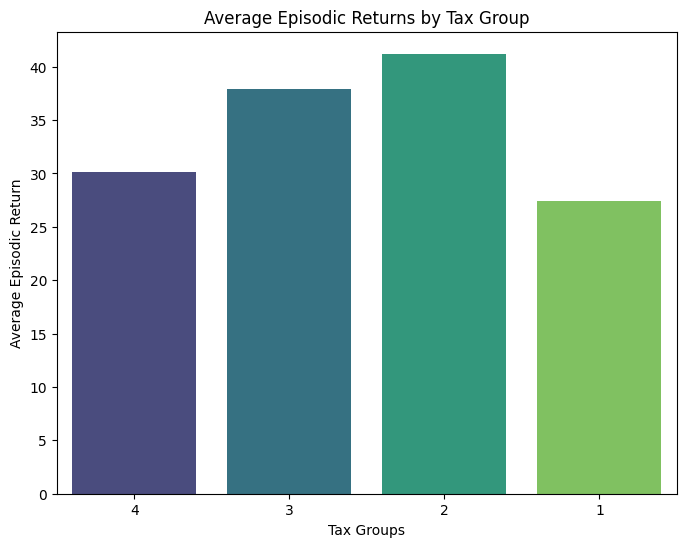

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_return_by_tax_group(avg_return):
    tax_groups = list(avg_return.keys())
    avg_returns = list(avg_return.values())

    plt.figure(figsize=(8,6))
    sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")
    plt.title("Average Episodic Returns by Tax Group")
    plt.xlabel("Tax Groups")
    plt.ylabel("Average Episodic Return")
    plt.show()

plot_return_by_tax_group(avg_return)